# MOBILE USAGE ANALYSIS

### Table of Content

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)<br>
3. [Data Profiling Treatment](#section3)<br>
    - 3.1 [Brand dataset](#section301)<br>
    - 3.2 [Age and gender dataset](#section302)<br>
    - 3.3 [Events dataset](#section303)<br>
4. [Visualization](#section4)<br>
    - 4.1 [Distribution of Users(device_id) across States](#section401)<br>
    - 4.2 [Distribution of Users across Phone Brands(Consider only 10 Most used Phone Brands)](#section402)<br>
    - 4.3 [Distribution of Users across Gender](#section403)<br>
    - 4.4 [Distribution of Users across Age Segment](#section404)<br>
    - 4.5 [Distribution of Phone Brands(Consider only 10 Most used Phone Brands) for each Age Segment, State, Gender](#section405)<br>
    - 4.6 [Distribuiion of Gender for each State, Age Segment and Phone Brand(Consider only 10 Most used Phone Brands)](#section406)<br>
    - 4.7 [Distribution of Age Segments for each State, Gender and Phone Brand(Consider only 10 Most used Phone Brands)](#section407)<br>
    - 4.8 [Hourly distribution of events](#section408)<br>
    - 4.9 [Plot the Users on the Map using any suitable package](#section409)<br>
5. [Conclusion](#section5)<br>

<a id=section1></a>

### 1. Problem Statement

It is always wonderful to see services customized to your needs. Businesses try to understand your behaviour and adjust their offerings so as to ensure you feel attached to their services.

**InsaidTelecom**, one of the leading telecom players, understands that **customizing offering** is very important for its business to stay competitive. Currently, InsaidTelecom is seeking to leverage behavioural data from more than 60% of the 50 million mobile devices active daily in India to help its clients better understand and interact with their audiences.

Objective of this **consulting assignment** is to **build a dashboard** to understand **user's demographic characteristics** based on their **mobile usage, geolocation, and mobile device properties**. Doing so will help millions of developers and brand advertisers around the world pursue data-driven marketing efforts which are relevant to their users and catered to their preferences.

<a id=section1></a>

<a id=section2></a>

### 2. Data Description

In [1]:
import numpy as np                                            # Implemennts milti-dimensional array and matrices
import pandas as pd                                           # For data manipulation and analysis
#import pandas_profiling
import matplotlib.pyplot as plt                               # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                         # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline                                           
# Allow plots to appear directly in the notebook

import math 
from collections import Counter 
import folium
from folium.plugins import HeatMap
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing dataset using pd.read_csv
agt = pd.read_csv('D://DataBase//Telecom_Capstone//gender_age_train.csv')
events = pd.read_csv('D://DataBase//Telecom_Capstone//events_data.csv')
brand = pd.read_csv('D://DataBase//Telecom_Capstone//phone_brand_device_model.csv')

In [3]:
agt.head()                                                  #Gives the first five rows of gender_age_train

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [4]:
agt.shape                                  #Gives the number of rows and columns in the dataframe

(74645, 4)

In [5]:
events.head()                                                  #Gives the first five rows of events_data

,event_id,device_id,timestamp,longitude,latitude,city,state
0,1.0,2.918269e+16,2016-05-01 00:55:25,77.266049,28.68161,Delhi,Delhi
1,7104.0,2.918269e+16,2016-05-02 09:37:02,77.266049,28.68161,Delhi,Delhi
2,29661.0,2.918269e+16,2016-05-04 00:56:04,77.266049,28.68161,Delhi,Delhi
3,33133.0,2.918269e+16,2016-05-06 05:01:15,77.266049,28.68161,Delhi,Delhi
4,38980.0,2.918269e+16,2016-05-06 09:55:04,77.266049,28.68161,Delhi,Delhi


In [6]:
events.shape                                   #Gives the number of rows and columns in the dataframe

(3252950, 7)

In [7]:
brand.head()                                                  #Gives the first five rows of phone_brand_device_model

,device_id,phone_brand,device_model
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,小米,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,三星,A368t
4,-2015528097870762664,小米,红米Note2


In [8]:
brand.shape                                 #Gives the number of rows and columns in the dataframe

(87726, 3)

<a id=section2></a>

<a id=section3></a>

### 3. Data profiling and treatment

<a id=section301></a>

#### 3.1. Brand dataset

In [9]:
brand.info()                            #Gives index, datatype and memory info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
device_id       87726 non-null int64
phone_brand     87726 non-null object
device_model    87726 non-null object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [10]:
brand.isnull().sum()                        #Gives the null values count

device_id       0
phone_brand     0
device_model    0
dtype: int64

In [11]:
brand['phone_brand'].nunique()             #Get the count of unique phone_brand

116

Brand dataframe includes, non-English phone brand and device models.  These need English translation for readability.  Google translator package was used and failed due to API time restriction.  Using the predefined translations provided by INSAIDTelcom.

In [12]:
#Creating a new dataframe with phone_brand count
brand_count = pd.DataFrame(list(Counter(brand['phone_brand']).items()), columns = ['phoneBrand','count'])
brand_count = brand_count.sort_values('count',ascending=False)          #Sort values per Count  
brand_count = brand_count.reset_index(drop=True)                        #Reset the index
brand_count.head(20)                                                    #View top 20 brands

,phoneBrand,count
0,小米,21645
1,三星,19211
2,华为,15181
3,vivo,7596
4,OPPO,6717
5,魅族,5531
6,酷派,3979
7,HTC,1272
8,联想,982
9,乐视,841


Top 20 brands contribute to 85,789 observations of the dataset.

In [13]:
#Translate all the Chinese names to English (which appear in the top 20)
brand = brand.replace({'华为':'Huawei'},regex=True)
brand = brand.replace({'小米':'Xiaomi'},regex=True)
brand = brand.replace({'三星':'Samsung'},regex=True)
brand = brand.replace({'魅族':'Meizu'},regex=True)
brand = brand.replace({'酷派':'Coolpad'},regex=True)
brand = brand.replace({'乐视':'LeEco'},regex=True)
brand = brand.replace({'联想':'Lenovo'},regex=True)  
brand = brand.replace({'丰米':'Fonmi'},regex=True)  
brand = brand.replace({'努比亚':'Nubia'},regex=True)
brand = brand.replace({'中国移动':'China Mobile'},regex=True)
brand = brand.replace({'锤子':'hammer'},regex=True)
brand = brand.replace({'朵唯':'Dowi'},regex=True)
brand = brand.replace({'优米':'Quality rice'},regex=True)
brand = brand.replace({'海信':'Hisense'},regex=True)
brand = brand.replace({'一加':'One plus'},regex=True)
brand = brand.replace({'奇酷':'Kiku'},regex=True)

In [14]:
brand['device_model'].nunique()          #Get the count of unique device_model

1467

In [15]:
#Creating a new dataframe with device_model count
model_count = pd.DataFrame(list(Counter(brand['device_model']).items()), columns = ['deviceModel','count'])
model_count = model_count.sort_values('count',ascending=False)          #Sort values per Count  
model_count = model_count.reset_index(drop=True)                        #Reset the index
model_count.head(10)                                                    #View top 10 model

,deviceModel,count
0,红米note,3500
1,MI 3,2739
2,MI 2S,2547
3,Galaxy Note 3,2378
4,MI 4,2256
5,Galaxy S4,1910
6,Galaxy Note 2,1877
7,荣耀6,1471
8,荣耀畅玩4X,1279
9,荣耀3C,1206


In [16]:
#Translate all the Chinese names to English (which appear in the top 50)
brand = brand.replace({'红米':'Red rice'},regex=True)
brand = brand.replace({'荣耀畅玩':'Glory play'},regex=True)
brand = brand.replace({'荣耀':'glory'},regex=True)
brand = brand.replace({'魅蓝':'Charm Blue'},regex=True)
brand = brand.replace({'增强版':'Enhanced Edition'},regex=True)
brand = brand.replace({'畅玩版':'Play Version'},regex=True)
brand = brand.replace({'大神':'Ogami'},regex=True)
brand = brand.replace({'超级手机':'Super phone'},regex=True)

<a id=section301></a>

<a id=section302></a>

#### 3.2. Age and gender dataset

In [17]:
agt.head()                       #Gives the first five rows of dataframe

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [18]:
agt.info()                                    #Gives index, datatype and memory info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
device_id    74645 non-null int64
gender       74645 non-null object
age          74645 non-null int64
group        74645 non-null object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [19]:
agt.isnull().sum()                           #Look for null value

device_id    0
gender       0
age          0
group        0
dtype: int64

In [20]:
agt.describe()

,device_id,age
count,7.464500e+04,74645.000000
mean,-7.491354e+14,31.410342
std,5.327150e+18,9.868735
min,-9.223067e+18,1.000000
25%,-4.617367e+18,25.000000
50%,-1.841362e+16,29.000000
75%,4.636656e+18,36.000000
max,9.222849e+18,96.000000


In [21]:
agt.group.unique()

array(['M32-38', 'M29-31', 'F24-26', 'F33-42', 'F27-28', 'M39+', 'M23-26',
       'M27-28', 'M22-', 'F43+', 'F23-', 'F29-32'], dtype=object)

<a id=section302></a>

<a id=section303></a>

#### 3.3. Events dataset

Events dataset has got the customers data across the country.  Analysis requires the **focus** for six states namely **TamilNadu, Manipur, Chandigarh, Tripura, UttarPradesh and ArunachalPradesh**.

In [22]:
#Extracting the states to focus for consulting (TamilNadu, Manipur, Chandigarh, Tripura, UttarPradesh, ArunachalPradesh)
new_event = events[events['state'].isin(['TamilNadu','Manipur','Chandigarh','Tripura','UttarPradesh','ArunachalPradesh'])]

In [23]:
new_event

,event_id,device_id,timestamp,longitude,latitude,city,state
1428965,1559715.0,4.197788e+18,2016-05-07 21:54:15,80.353801,13.177924,Chennai,TamilNadu
1428966,2418233.0,4.197788e+18,2016-05-06 07:45:05,80.353801,13.177924,Chennai,TamilNadu
1428967,3038840.0,4.197788e+18,2016-05-07 22:12:15,80.353801,13.177924,Chennai,TamilNadu
1428968,1559989.0,8.121927e+17,2016-05-02 22:40:24,80.324694,13.161864,Chennai,TamilNadu
1428969,1875896.0,8.121927e+17,2016-05-02 02:03:46,80.324694,13.161864,Chennai,TamilNadu
...,...,...,...,...,...,...,...
2829970,3238143.0,-7.121363e+18,2016-05-04 15:20:16,77.703167,29.561617,Muzaffarnagar,UttarPradesh
2829973,3241114.0,3.602749e+18,2016-05-02 17:10:30,79.805795,27.992214,Tilhar,UttarPradesh
2829974,3242248.0,-2.693068e+18,2016-05-07 17:44:38,82.235358,26.857899,Faizabad,UttarPradesh
2829976,3245662.0,-8.311902e+18,2016-05-06 19:27:23,78.810885,28.496424,Chandausi,UttarPradesh


In [24]:
new_event.info()                           #Gives index, datatype and memory info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534415 entries, 1428965 to 2829977
Data columns (total 7 columns):
event_id     534415 non-null float64
device_id    534352 non-null float64
timestamp    534415 non-null object
longitude    534352 non-null float64
latitude     534352 non-null float64
city         534415 non-null object
state        534415 non-null object
dtypes: float64(4), object(3)
memory usage: 32.6+ MB


In [25]:
new_event.isnull().sum()                   # Look for null values

event_id      0
device_id    63
timestamp     0
longitude    63
latitude     63
city          0
state         0
dtype: int64

We observe that **device_id, longitude and latitude have got missing values**.  Will impute them in order to proceed with the further analysis.

#### Impute device_id

In [26]:
#Extract the logitude, latitude, city and state corresponding to missing device_id fields
empty_device_ID = new_event.loc[pd.isnull(new_event['device_id']),['longitude','latitude','city','state']].drop_duplicates()
empty_device_ID

,longitude,latitude,city,state
1585123,80.309272,13.149176,Chennai,TamilNadu
1596647,80.335435,13.189053,Chennai,TamilNadu
1648241,80.343613,13.153332,Chennai,TamilNadu


From the above, it is clear that there **three distinct geo codes** corresponding to chennai city.  With the help of these geo codes, we will populate the missing device_id.

In [27]:
def findNonEmptyDeviceDataBy(longitude, latitude, city, state):
    '''Function to extract the device_id if the geo codes, city and state match the observation being passed'''
    return new_event.loc[(new_event['city']==city) & (round(new_event['longitude'],6)==longitude) & 
                          (round(new_event['latitude'],6)==latitude) & (new_event['device_id'].notnull()),
                          ['device_id']]['device_id'].unique()

In [28]:
#Look for possible device_id matching the geo codes.
for index, row in empty_device_ID.iterrows():
    print(findNonEmptyDeviceDataBy(round(row['longitude'],6),round(row['latitude'],6),row['city'],row['state']))

[7.66213914e+18]
[7.98387143e+18]
[5.73136927e+18]


In [29]:
def createMask(longitude, latitude, city, state):
    '''Function to return the values if they match the parameters being passed'''
    return (new_event['city']==city) & (round(new_event['longitude'],6)==longitude) & (round(new_event['latitude'],6)==latitude)

In [30]:
#Impute the missing device_id
for index, row in empty_device_ID.iterrows():
    new_event.loc[(createMask(round(row['longitude'],6),round(row['latitude'],6),row['city'],row['state'])) & 
                   (new_event['device_id'].isnull()),['device_id']] = findNonEmptyDeviceDataBy(round(row['longitude'],6), round(row['latitude'],6),row['city'],row['state'])

#### Impute Longitude

In [31]:
#Extract the device_id, city and state corresponding to missing logitude fields
empty_longitude = new_event.loc[(pd.isnull(new_event['longitude'])),['device_id','city','state']].drop_duplicates()
empty_longitude

,device_id,city,state
1585119,7.662139e+18,Chennai,TamilNadu
1596643,7.983871e+18,Chennai,TamilNadu
1648237,5.731369e+18,Chennai,TamilNadu


From the above, it is clear that there **three distinct device_id** corresponding to chennai city.  With the help of these device_id, we will populate the missing longitude.

In [32]:
def findNonEmptylongitudeBy(device_id, city, state):
    '''Function to extract the longitude if the device_id, city and state match the observation being passed'''
    return new_event.loc[(new_event['device_id']==device_id) & (new_event['city']==city) & (new_event['state']==state)
                         & (new_event['longitude'].notnull()),['longitude','latitude']].drop_duplicates()

In [33]:
#Look for possible longitude matching the device_id
for index, row in empty_longitude.iterrows():
    print(findNonEmptylongitudeBy(row['device_id'],row['city'],row['state']))

         longitude   latitude
1585066  80.309272  13.149176
         longitude   latitude
1596590  80.335435  13.189053
         longitude   latitude
1648184  80.343613  13.153332


In [34]:
def geoMask(device_id, city, state):
    '''Function to return the values if they match the parameters being passed'''
    return ((new_event['device_id']==device_id) & (new_event['city']==city) & (new_event['state']==state) & (new_event['longitude'].isnull()))

In [35]:
#Impute the missing longitude
for index, row in empty_longitude.iterrows():
    new_event.loc[(geoMask(row['device_id'],row['city'],row['state'])) & 
                   (new_event['longitude'].isnull()),['longitude']] = findNonEmptylongitudeBy(row['device_id'],row['city'],row['state'])['longitude'].values[0]

#### Impute Latitude

In [36]:
#Extract the device_id, city and state corresponding to missing latitude fields
empty_latitude = new_event.loc[(pd.isnull(new_event['latitude'])),['device_id','city','state']].drop_duplicates()
empty_latitude

,device_id,city,state
1585119,7.662139e+18,Chennai,TamilNadu
1596643,7.983871e+18,Chennai,TamilNadu
1648237,5.731369e+18,Chennai,TamilNadu


From the above, it is clear that there **three distinct device_id** corresponding to chennai city.  With the help of these device_id, we will populate the missing latitude.

In [37]:
def findNonEmptylatitudeBy(device_id, city, state):
    '''Function to extract the latitude if the device_id, city and state match the observation being passed'''
    return new_event.loc[(new_event['device_id']==device_id) & (new_event['city']==city) & (new_event['state']==state)
                         & (new_event['latitude'].notnull()),['longitude','latitude']].drop_duplicates()

In [38]:
def geoMaskLatitude(device_id, city, state):
    '''Function to return the values if they match the parameters being passed'''
    return ((new_event['device_id']==device_id) & (new_event['city']==city) & (new_event['state']==state) & (new_event['latitude'].isnull()))

In [39]:
#Impute the missing latitude
for index, row in empty_latitude.iterrows():
    new_event.loc[(geoMaskLatitude(row['device_id'],row['city'],row['state'])) & 
                   (new_event['latitude'].isnull()),['latitude']] = findNonEmptylongitudeBy(row['device_id'],row['city'],row['state'])['latitude'].values[0]

In [40]:
#Check for null values after the missing value imputation
new_event.isnull().sum()

event_id     0
device_id    0
timestamp    0
longitude    0
latitude     0
city         0
state        0
dtype: int64

As the missing value imputation is completed.  Geo codes will be analyzed further to check if values are valid, non-zero and outliers.  We will get started by plotting the geo codes on the map.

In [41]:
#Extract the geo codes alone and create a dataframe for plotting them on the map
geo_df = new_event
geo_df = geo_df.groupby(["longitude", "latitude","city","state"]).size().reset_index(name="count")
geo_df.sort_values('count', ascending = False)

,longitude,latitude,city,state,count
7836,80.359796,13.128174,Chennai,TamilNadu,33405
5968,80.309010,13.114228,Chennai,TamilNadu,14555
5326,80.291743,13.145584,Chennai,TamilNadu,3791
7226,80.343613,13.153332,Chennai,TamilNadu,3534
5979,80.309272,13.149176,Chennai,TamilNadu,3506
...,...,...,...,...,...
5246,80.289487,13.188528,Chennai,TamilNadu,1
6191,80.314555,13.189403,Chennai,TamilNadu,1
5248,80.289535,13.108998,Chennai,TamilNadu,1
5249,80.289550,13.156504,Chennai,TamilNadu,1


In [42]:
geo_df.info()                #Check the dataframe fields

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9566 entries, 0 to 9565
Data columns (total 5 columns):
longitude    9566 non-null float64
latitude     9566 non-null float64
city         9566 non-null object
state        9566 non-null object
count        9566 non-null int64
dtypes: float64(2), int64(1), object(2)
memory usage: 373.8+ KB


In [43]:
base_map = folium.Map(location=[20.5937,78.9629], control_scale=True, zoom_start=5)
HeatMap(data=geo_df[['latitude', 'longitude', 'count']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)
base_map

From the map, we observe that **most users** are from **TamilNadu and UttarPradesh**. Nevertheless, it doesn't reveal any outliers. Plotting the geo codes using **scatter plot**, will aid a better identification of **outliers if any**.

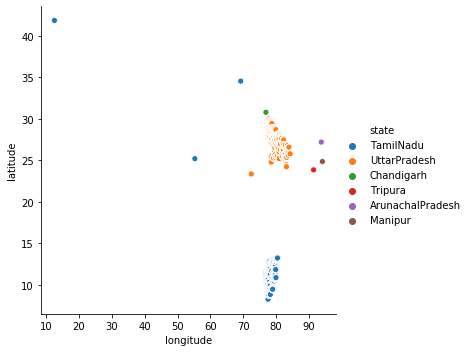

In [44]:
sns.relplot(data=geo_df, y='latitude', x='longitude', hue='state')
plt.show()

It is obvious that **TamilNadu and UttarPradesh have got some outlier values**.  Extracting them below for further analysis.

In [45]:
#Extract the outliers in TamilNadue
tn_out_data=new_event.loc[(new_event['state']=='TamilNadu') & (new_event['longitude']<75) & (new_event['latitude']>20),['longitude','latitude','city','state']].drop_duplicates()
tn_out_data

,longitude,latitude,city,state
1576980,69.2075,34.5553,Chennai,TamilNadu
1704983,55.2708,25.2048,Chennai,TamilNadu
1777732,12.5674,41.8719,Chennai,TamilNadu


In [46]:
#Extract the outliers in UttarPradesh
up_out_data=new_event.loc[(new_event['state']=='UttarPradesh') & (new_event['longitude']<73) & (new_event['latitude']<25),['longitude','latitude','city','state']].drop_duplicates()
up_out_data

,longitude,latitude,city,state
2635938,72.419673,23.397143,Kadi,UttarPradesh
2666293,72.389010,23.368421,Kadi,UttarPradesh
2681346,72.425512,23.330159,Kadi,UttarPradesh
2694334,72.365270,23.375839,Kadi,UttarPradesh
2709507,72.426837,23.346063,Kadi,UttarPradesh
2722146,72.393517,23.338049,Kadi,UttarPradesh
2731752,72.367590,23.389080,Kadi,UttarPradesh
2740130,72.394669,23.327080,Kadi,UttarPradesh
2757842,72.356246,23.390456,Kadi,UttarPradesh
2762356,72.420054,23.334427,Kadi,UttarPradesh


In [47]:
#Combine TamilNadu and UttarPradesh outlier values to create an outlier dataframe
geo_outlier=tn_out_data.append(up_out_data)
geo_outlier

,longitude,latitude,city,state
1576980,69.207500,34.555300,Chennai,TamilNadu
1704983,55.270800,25.204800,Chennai,TamilNadu
1777732,12.567400,41.871900,Chennai,TamilNadu
2635938,72.419673,23.397143,Kadi,UttarPradesh
2666293,72.389010,23.368421,Kadi,UttarPradesh
2681346,72.425512,23.330159,Kadi,UttarPradesh
2694334,72.365270,23.375839,Kadi,UttarPradesh
2709507,72.426837,23.346063,Kadi,UttarPradesh
2722146,72.393517,23.338049,Kadi,UttarPradesh
2731752,72.367590,23.389080,Kadi,UttarPradesh


In [48]:
locations = geo_outlier[['latitude','longitude']].drop_duplicates()
print(locations[locations['latitude'].isnull()].shape)
locationlist= locations.values.tolist()

(0, 2)


In [49]:
len(locationlist)

28

Plot the geo code outliers dataframe for visualize understanding of the outlier values.

In [50]:
import folium

map1 = folium.Map(location=locationlist[27], zoom_start=5)

for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point]).add_to(map1)
    
map1

Above graph clearly shows that the incorrect/outlier geo locations add no value to the analysis.  It is imperative to remove these in order to get the correct insights.

In [51]:
#Drop the rows with outlier geo code values for state - TamilNadu
new_event= new_event.drop(new_event[(new_event['state']=='TamilNadu') & (new_event['longitude']<75) &
                                      (new_event['latitude']>20)].index)

In [52]:
#Drop the rows with outlier geo code values for state - UttarPradesh
new_event=new_event.drop(new_event[(new_event['state']=='UttarPradesh') & (new_event['longitude']<73) &
                                      (new_event['latitude']<25)].index)

In [53]:
geo_df=new_event[['longitude','latitude','city','state']].drop_duplicates()

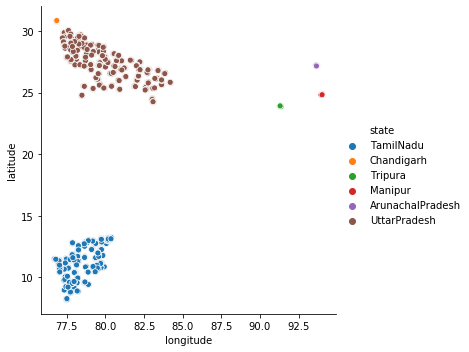

In [54]:
#Plot the filtered geo code
sns.relplot(data=geo_df, y='latitude', x='longitude', hue='state')
plt.show()

Above graph explains no more outliers.  We will move to the next step of the analysis.

In [55]:
#Convert the timestamp to data format
new_event['timestamp'] =  pd.to_datetime(new_event['timestamp'], format='%Y-%m-%d %H:%M:%S') #convert the column to date time format

#Split the date time column into different columns for easy access
new_event['year'] = new_event['timestamp'].dt.year
new_event['month'] = new_event['timestamp'].dt.month
new_event['week'] = new_event['timestamp'].dt.week
new_event['day'] = new_event['timestamp'].dt.dayofweek
new_event['hour'] = new_event['timestamp'].dt.hour

new_event.drop(['timestamp'], axis = 1, inplace = True)  #Drop timestamp column which is no more required
new_event.sample()      #check the changes applied

,event_id,device_id,longitude,latitude,city,state,year,month,week,day,hour
2644714,2669067.0,5.550802e+18,83.062747,25.349566,Varanasi,UttarPradesh,2016,5,18,5,17


In [56]:
#Check if the events dataframe is good to go.
new_event.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533459 entries, 1428965 to 2829977
Data columns (total 11 columns):
event_id     533459 non-null float64
device_id    533459 non-null float64
longitude    533459 non-null float64
latitude     533459 non-null float64
city         533459 non-null object
state        533459 non-null object
year         533459 non-null int64
month        533459 non-null int64
week         533459 non-null int64
day          533459 non-null int64
hour         533459 non-null int64
dtypes: float64(4), int64(5), object(2)
memory usage: 48.8+ MB


<a id=section303></a>

#### Combine the tables

In [57]:
#Convert the type of device_id in order to merge the tables
agt['device_id'] = agt['device_id'].astype('float64')
brand['device_id'] = brand['device_id'].astype('float64')

In [58]:
combinedf = new_event.merge(agt, on = 'device_id', how='inner').merge(brand, on='device_id', how='inner')
combinedf.shape

(411599, 16)

In [59]:
combinedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411599 entries, 0 to 411598
Data columns (total 16 columns):
event_id        411599 non-null float64
device_id       411599 non-null float64
longitude       411599 non-null float64
latitude        411599 non-null float64
city            411599 non-null object
state           411599 non-null object
year            411599 non-null int64
month           411599 non-null int64
week            411599 non-null int64
day             411599 non-null int64
hour            411599 non-null int64
gender          411599 non-null object
age             411599 non-null int64
group           411599 non-null object
phone_brand     411599 non-null object
device_model    411599 non-null object
dtypes: float64(4), int64(6), object(6)
memory usage: 53.4+ MB


<a id=section3></a>

<a id=section4></a>

### Visualization

<a id=section401></a>

#### 4.1. Distribution of Users(device_id) across States

In [60]:
#Filter the top ten phone_brand
toptenbrand = combinedf.groupby('phone_brand').device_id.nunique().reset_index().sort_values(['device_id'], ascending=False).head(10)
toptenbrand

,phone_brand,device_id
20,Xiaomi,1756
18,Samsung,1547
5,Huawei,1085
23,vivo,652
14,OPPO,511
12,Meizu,422
1,Coolpad,350
3,HTC,111
10,Lenovo,78
9,LeEco,65


In [61]:
#Create dataframe with unique device_id
unique_device = combinedf.drop_duplicates(subset='device_id', keep="first")
unique_device.sample()

,event_id,device_id,longitude,latitude,city,state,year,month,week,day,hour,gender,age,group,phone_brand,device_model
1825,2447321.0,6.160830e+18,80.320263,13.103783,Chennai,TamilNadu,2016,5,18,0,9,M,36,M32-38,Xiaomi,MI 4


In [62]:
#create dataframe with the top ten phone brand for plotting
graph_df = unique_device[unique_device.phone_brand.isin(['Xiaomi','Samsung','Huawei','vivo','OPPO','Meizu','Coolpad','HTC','Lenovo','LeEco'])]
graph_df.sample()

,event_id,device_id,longitude,latitude,city,state,year,month,week,day,hour,gender,age,group,phone_brand,device_model
207054,1223.0,6.425512e+18,80.334864,13.180897,Chennai,TamilNadu,2016,5,18,0,1,M,53,M39+,Xiaomi,Xiaominote


[Text(0, 0.5, 'User count'), Text(0.5, 0, 'State')]

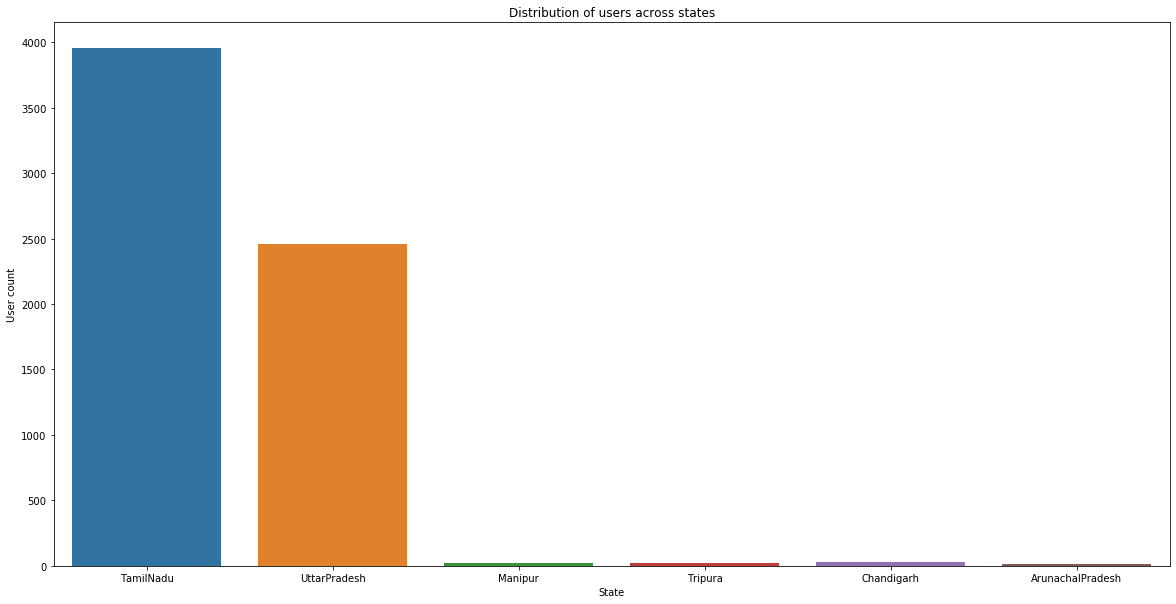

In [63]:
fig, ax = plt.subplots(figsize = (20,10))
sns.countplot(x='state', data=graph_df.sort_values(['device_id'],ascending=False)).set_title('Distribution of users across states')
ax.set(xlabel='State', ylabel='User count')

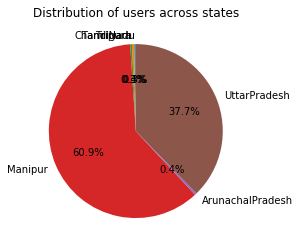

In [64]:
plt.pie(unique_device.groupby('state')['state'].count(), labels=unique_device['state'].unique(), startangle=90, autopct='%.1f%%')
plt.title('Distribution of users across states')
plt.show()

- TamilNadu has the highest number of customers followed by UttarPradesh
- ArunachalPradesh is with the least.

<a id=section401></a>

<a id=section402></a>

#### 4.2. Distribution of Users across Phone Brands(Consider only 10 Most used Phone Brands)

[Text(0, 0.5, 'User count'), Text(0.5, 0, 'Phone brand')]

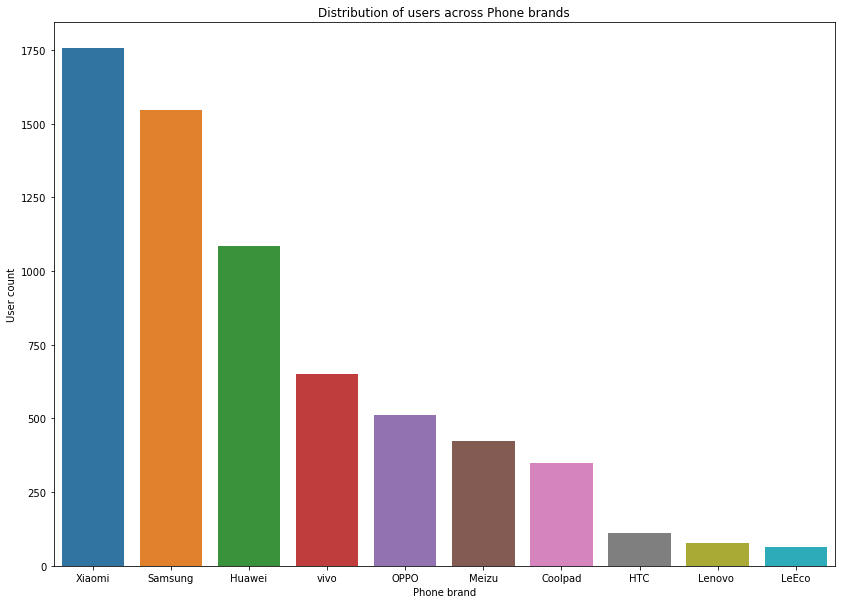

In [65]:
fig, ax = plt.subplots(figsize = (14,10))
sns.countplot(x='phone_brand', data=unique_device.sort_values(['device_id'],ascending=False), 
              order=unique_device.phone_brand.value_counts().iloc[:10].index).set_title('Distribution of users across Phone brands')
ax.set(xlabel='Phone brand', ylabel='User count')

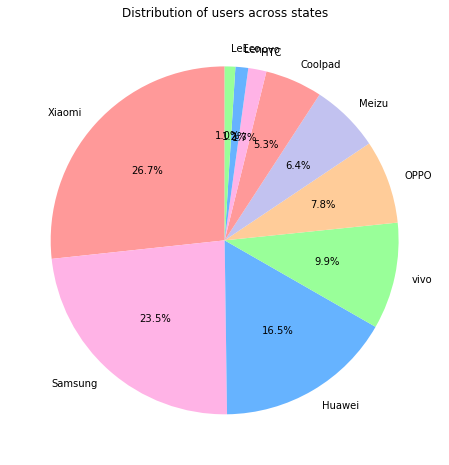

In [66]:
colors = ['#ff9999','#ffb3e6','#66b3ff','#99ff99','#ffcc99','#c2c2f0']
fig, ax = plt.subplots(figsize = (8,8))
plt.pie(toptenbrand['device_id'], labels=toptenbrand['phone_brand'], colors=colors, startangle=90, autopct='%.1f%%')
plt.title('Distribution of users across states')
plt.show()

- Xiaomi has got most customers followed by Samsung and Huawei
- 26.7% of the market is dominated by Xiamomi

<a id=section402></a>

<a id=section403></a>

#### 4.3. Distribution of Users across Gender

[Text(0, 0.5, 'User count'), Text(0.5, 0, 'Gender')]

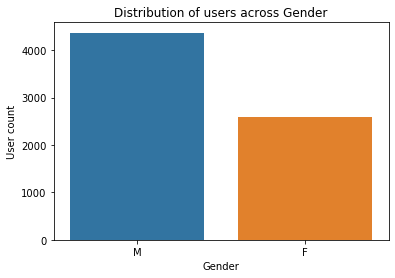

In [67]:
fig, ax = plt.subplots(figsize = (6,4))
sns.countplot(x='gender', data=unique_device).set_title('Distribution of users across Gender')
ax.set(xlabel='Gender', ylabel='User count')

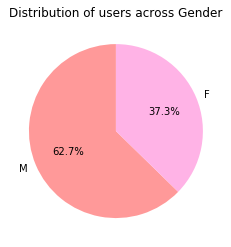

In [68]:
gen_cnt = [unique_device[unique_device.gender == 'M']['gender'].count(), unique_device[unique_device.gender == 'F']['gender'].count()]
plt.pie(gen_cnt, labels=unique_device['gender'].unique(), colors=colors, startangle=90, autopct='%.1f%%')
plt.title('Distribution of users across Gender')
plt.show()

- 62.7% of the users are Male and remaining are female

<a id=section403></a>

<a id=section404></a>

#### 4.4. Distribution of Users across Age Segments.

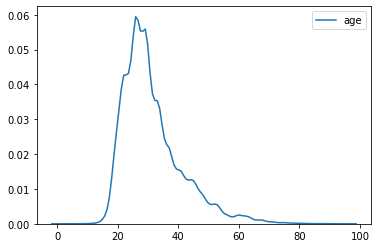

In [69]:
sns.kdeplot(agt['age'])

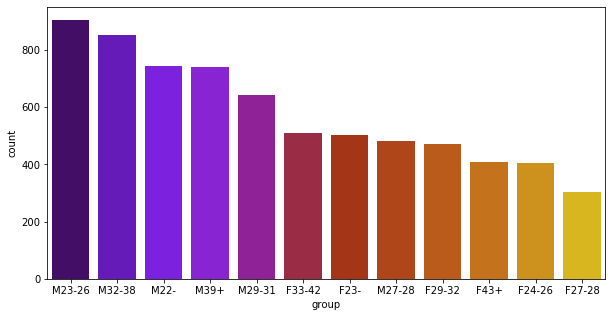

In [70]:
plt.figure(figsize=(10,5))
sns.countplot('group',data = unique_device, order = unique_device['group'].value_counts().index,palette="gnuplot")

- Highest number of male users fall in M23-26 age group. 
- Highest number of female users fall in F33-42 age group. 

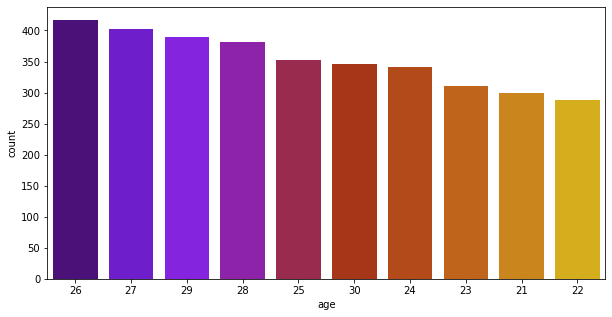

In [71]:
plt.figure(figsize=(10,5))
sns.countplot('age',data = unique_device, order = unique_device['age'].value_counts().head(10).index,palette="gnuplot")

- Top ten count of users age spanning from 21 through 30 years old.
- Majority of customers are 26 years old followed by 27.

<a id=section404></a>

<a id=section405></a>

#### 4.5. Distribution of Phone Brands(Consider only 10 Most used Phone Brands) for each Age Segment, State, Gender

[Text(0, 0.5, 'User count'), Text(0.5, 0, 'Phone brand')]

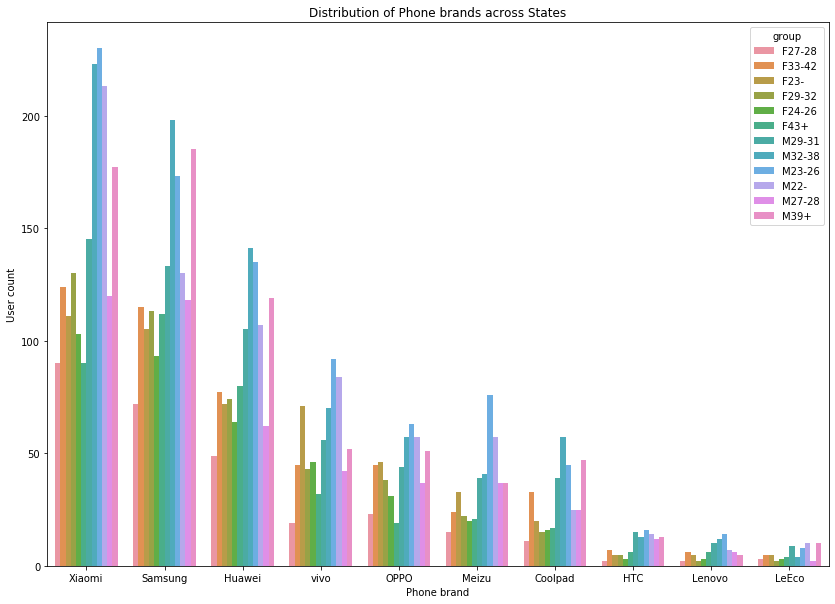

In [72]:
fig, ax = plt.subplots(figsize = (14,10))
sns.countplot(x='phone_brand', data=unique_device.sort_values(['device_id'],ascending=False), 
              order=unique_device.phone_brand.value_counts().iloc[:10].index, hue='group').set_title('Distribution of Phone brands across States')
ax.set(xlabel='Phone brand', ylabel='User count')

[Text(0, 0.5, 'User count'), Text(0.5, 0, 'Phone brand')]

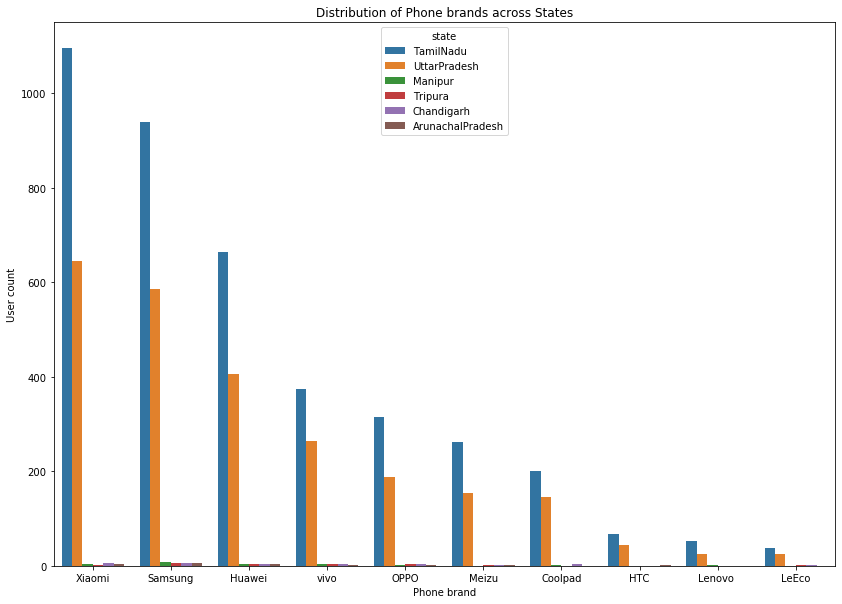

In [73]:
fig, ax = plt.subplots(figsize = (14,10))
sns.countplot(x='phone_brand', data=unique_device.sort_values(['device_id'],ascending=False), 
              order=unique_device.phone_brand.value_counts().iloc[:10].index, hue='state').set_title('Distribution of Phone brands across States')
ax.set(xlabel='Phone brand', ylabel='User count')

[Text(0, 0.5, 'User count'), Text(0.5, 0, 'Phone brand')]

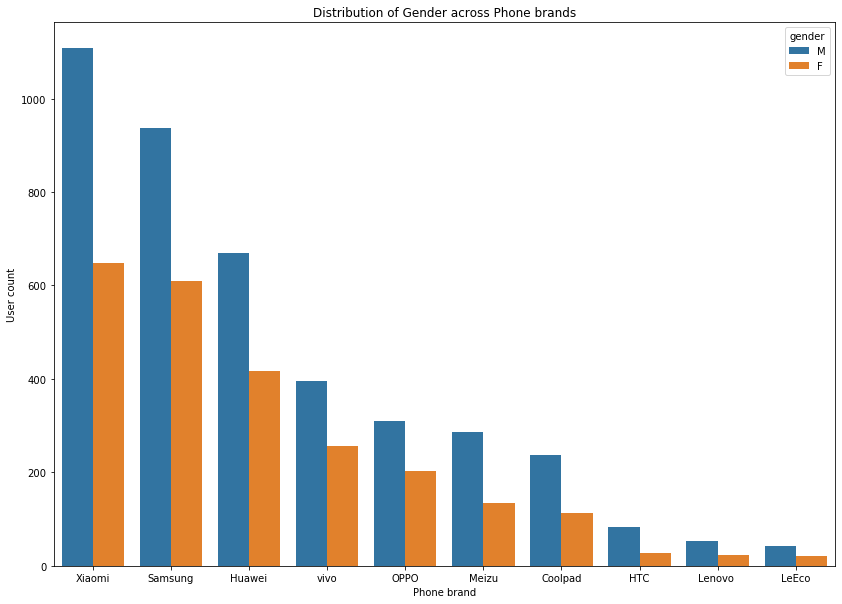

In [74]:
fig, ax = plt.subplots(figsize = (14,10))
sns.countplot(x='phone_brand', data=unique_device, order=unique_device.phone_brand.value_counts().iloc[:10].index,
              hue='gender').set_title('Distribution of Gender across Phone brands')
ax.set(xlabel='Phone brand', ylabel='User count')

- The most loved phone brand is Xiaomi regardless of the age, gender and state the user belong to.
- This signifies that Xiaomi phone's features, cost, durability, etc is accepted by wide customers.

<a id=section405></a>

<a id=section406></a>

#### 4.6. Distribuiion of Gender for each State, Age Segment and Phone Brand(Consider only 10 Most used Phone Brands)

[Text(0, 0.5, 'User count'), Text(0.5, 0, 'Gender')]

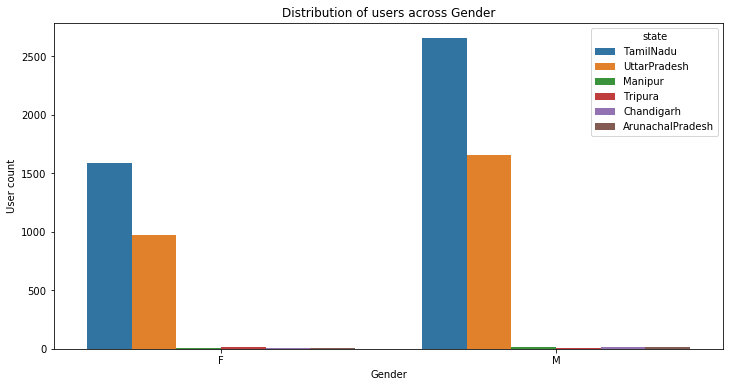

In [75]:
fig, ax = plt.subplots(figsize = (12,6))
sns.countplot(x='gender', data=unique_device.sort_values(['device_id'],ascending=False), hue='state').set_title('Distribution of users across Gender')
ax.set(xlabel='Gender', ylabel='User count')

[Text(0, 0.5, 'User count'), Text(0.5, 0, 'Gender')]

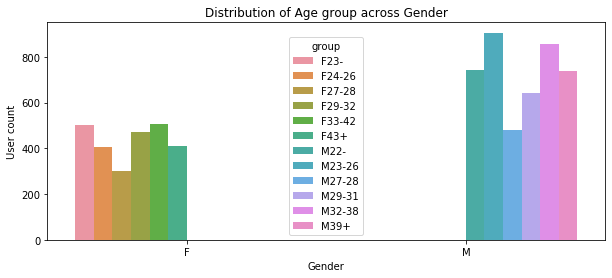

In [76]:
fig, ax = plt.subplots(figsize = (10,4))
sns.countplot(x='gender', data=unique_device.sort_values(['group'],ascending=True), hue='group').set_title('Distribution of Age group across Gender')
ax.set(xlabel='Gender', ylabel='User count')

[Text(0, 0.5, 'User count'), Text(0.5, 0, 'Gender')]

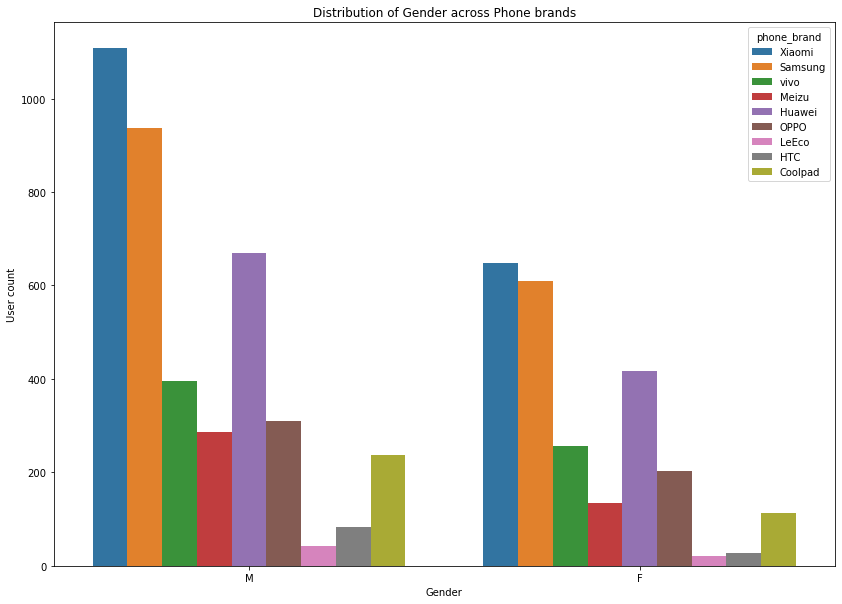

In [77]:
fig, ax = plt.subplots(figsize = (14,10))
sns.countplot(x='gender', data=graph_df, hue='phone_brand').set_title('Distribution of Gender across Phone brands')
ax.set(xlabel='Gender', ylabel='User count')

- Male users are high in number compared to female users.
- Customized offerings targetting Male users will be profitable; of course this has to be analysed further with the support of sales data. 

<a id=section406></a>

<a id=section407></a>

#### 4.7. Distribution of Age Segments for each State, Gender and Phone Brand(Consider only 10 Most used Phone Brands)

[Text(0, 0.5, 'User count'), Text(0.5, 0, 'Age group')]

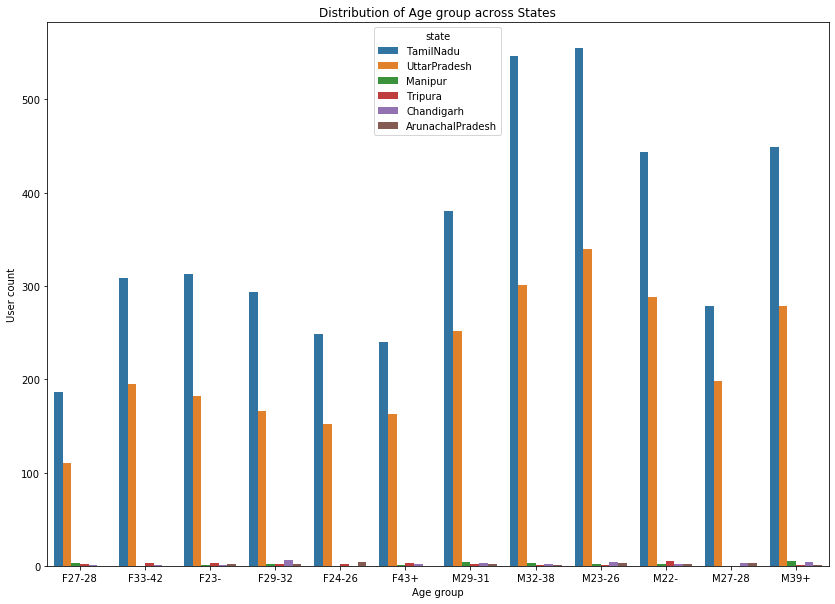

In [78]:
fig, ax = plt.subplots(figsize = (14,10))
sns.countplot(x='group', data=unique_device.sort_values(['device_id'],ascending=False), 
              hue='state').set_title('Distribution of Age group across States')
ax.set(xlabel='Age group', ylabel='User count')

[Text(0, 0.5, 'User count'), Text(0.5, 0, 'Age group')]

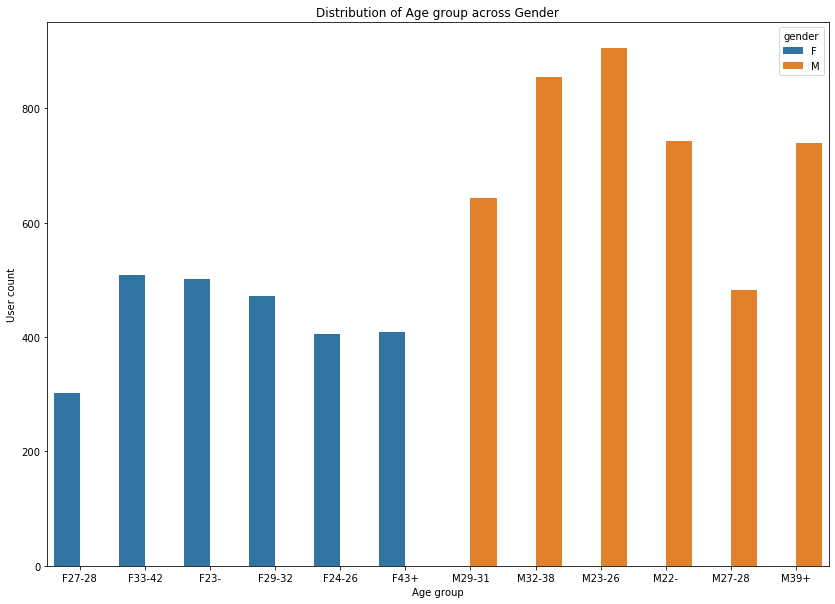

In [79]:
fig, ax = plt.subplots(figsize = (14,10))
sns.countplot(x='group', data=unique_device.sort_values(['device_id'],ascending=False), 
              hue='gender').set_title('Distribution of Age group across Gender')
ax.set(xlabel='Age group', ylabel='User count')

[Text(0, 0.5, 'User count'), Text(0.5, 0, 'Age group')]

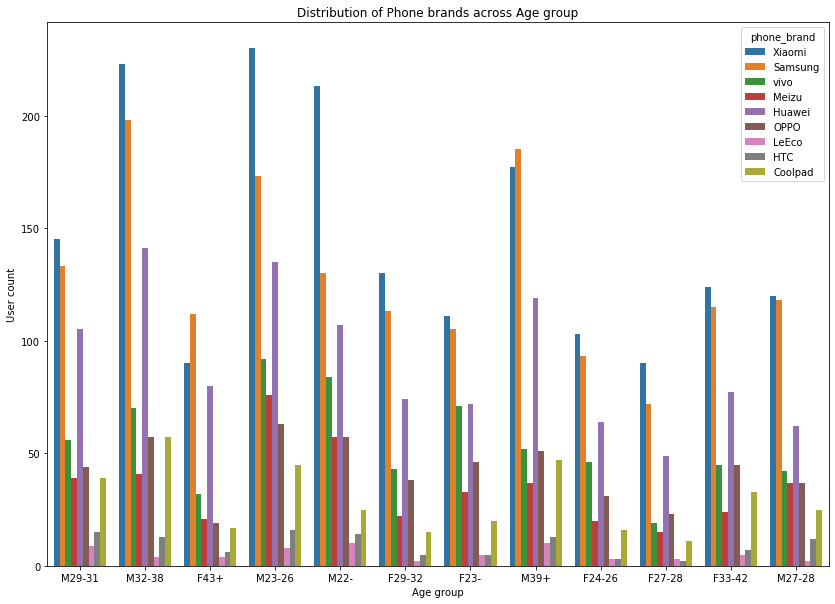

In [80]:
fig, ax = plt.subplots(figsize = (14,10))
sns.countplot(x='group', data=graph_df, hue='phone_brand').set_title('Distribution of Phone brands across Age group')
ax.set(xlabel='Age group', ylabel='User count')

<a id=section407></a>

<a id=section408></a>

#### 4.8. Hourly distribution of events

[Text(0, 0.5, 'Events count'), Text(0.5, 0, 'Hour')]

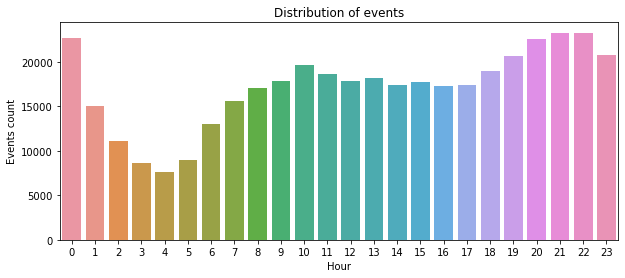

In [81]:
fig, ax = plt.subplots(figsize = (10,4))
sns.countplot(x='hour', data=combinedf).set_title('Distribution of events')
ax.set(xlabel='Hour', ylabel='Events count')

[Text(0, 0.5, 'Event count'), Text(0.5, 0, 'Hour')]

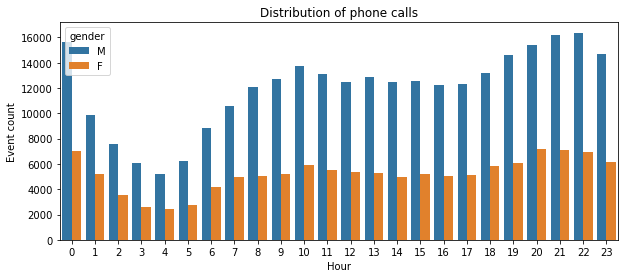

In [82]:
fig, ax = plt.subplots(figsize = (10,4))
sns.countplot(x='hour', data=combinedf,hue='gender').set_title('Distribution of phone calls')
ax.set(xlabel='Hour', ylabel='Event count')

[Text(0, 0.5, 'Event count'), Text(0.5, 0, 'Hour')]

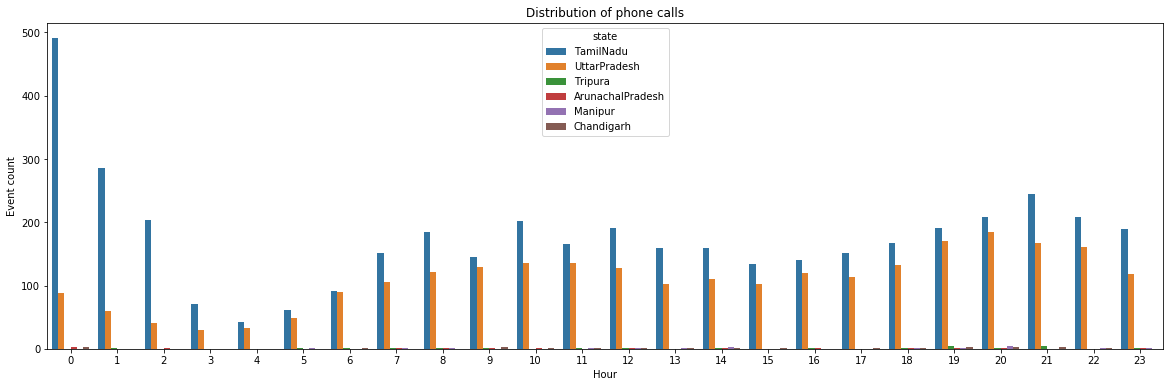

In [83]:
fig, ax = plt.subplots(figsize = (20,6))
sns.countplot(x='hour', data=unique_device.sort_values(['device_id']), hue='state').set_title('Distribution of phone calls')
ax.set(xlabel='Hour', ylabel='Event count')

[Text(0, 0.5, 'Phone call count'), Text(0.5, 0, 'Hour')]

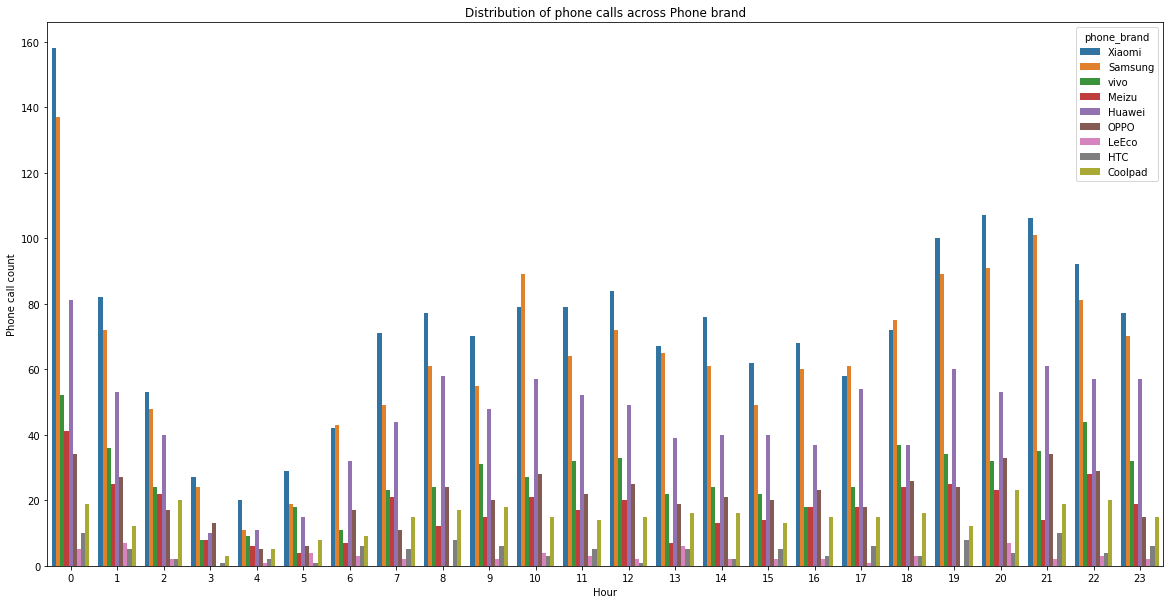

In [84]:
fig, ax = plt.subplots(figsize = (20,10))
sns.countplot(x='hour', data=graph_df, hue='phone_brand').set_title('Distribution of phone calls across Phone brand')
ax.set(xlabel='Hour', ylabel='Phone call count')

Visualisation of 'Frequency of the events' across the day aid to the below insights:
- Events count are more during 22nd hour of the day.  
- Male users are more compared to the female users throughout the day. 
- Mobile usage picks up from 18:00 hours and keeps increasing till 22:00 hour and drops the following hours. 
- Minimum events are observed during 04:00 hour.

<a id=section408></a>

<a id=section409></a>

#### 4.9. Plot the Users on the Map using any suitable package

In [85]:
geo_df1 = unique_device
geo_df1 = geo_df1.groupby(["longitude", "latitude","city","state"]).size().reset_index(name="count")
geo_df1.sort_values('count', ascending = False)

,longitude,latitude,city,state,count
0,76.700984,11.497595,Udagamandalam,TamilNadu,1
4639,80.319743,13.188876,Chennai,TamilNadu,1
4650,80.320058,13.132183,Chennai,TamilNadu,1
4649,80.320013,13.174271,Chennai,TamilNadu,1
4648,80.319967,13.117348,Chennai,TamilNadu,1
...,...,...,...,...,...
2317,78.845667,28.872724,Moradabad,UttarPradesh,1
2316,78.844632,9.436136,Ramanathapuram,TamilNadu,1
2315,78.843464,28.524799,Chandausi,UttarPradesh,1
2314,78.843256,28.483140,Chandausi,UttarPradesh,1


In [86]:
from folium.plugins import HeatMap
base_map = folium.Map(location=[20.5937,78.9629], control_scale=True, zoom_start=5)
HeatMap(data=geo_df1[['latitude', 'longitude', 'count']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)
base_map

- TamilNadu has got the highest number of users followed by UttarPradesh.
- ArunachalPradesh is the least.

<a id=section409></a>

<a id=section4></a>

<a id=section5></a>

### 5. Conclusion

Mobile phone has become an integral part of human life.  With the increased digital consumer space, it is imperative that the service providers are on top of customer's necessities and move them in the right direction or the right merchant.  This not only delight the customer but also service providers by enjoying their benefits.  The analysis has revealed a lot of interesting facts about the mobile phone users.  **26.7%** of the market is dominated by **Xiaomi** phone brand regardless of user’s demography and the region.  User activity is **high** during **18:00 - 22:00**. **** customers are the **major users** across the analysed regions.  **TamilNadu and UttarPradesh** top the list with the **largest number of users**.  INSAIDTelecom may customize their offerings by introducing **special packages for evening**.  It can may be increase/decrease in the call cost, data packs and SMS charges.

<a id=section5></a>